In [68]:

import pandas as pd
import numpy as np
import glob
from functools import partial
from scipy.stats import bootstrap

rng = np.random.default_rng()
def confint(data):
    return bootstrap((data,), statistic=np.mean, confidence_level=0.95, n_resamples=1000, random_state=rng).confidence_interval

sepfiles = glob.glob('r??/data?.csv')

frames = list()
for file in sepfiles:
    data = pd.read_csv(file, header=None)
    data.columns = ['fitness','aspsize']
    data['replicate'] = int(file.split('/')[0][-2:])
    data['generation'] = data.index+1
    data['pool'] = "ON" if file.endswith("1.csv") else "OFF"
    frames.append(data)
    #print(data.head()) #RM
df = pd.concat(frames)
df = df.pivot_table(values=['fitness','aspsize'],index=['generation','pool'],aggfunc=[np.mean,confint]).reset_index()
df.columns = [a+b for a,b in zip(df.columns.get_level_values(0),df.columns.get_level_values(1))]
#print(df.head())
#df['low'] = df['confintfitness']
df[['lowfitness','highfitness']] = pd.DataFrame(df.confintfitness.tolist())
df.drop(['confintaspsize','confintfitness'],axis=1,inplace=True)
#print(len(df))
#print(df.head())


/mnt/ufs18/home-107/jory/micromamba/envs/supexp/lib/python3.11/site-packages/scipy/stats/_resampling.py:144: RuntimeWarning: invalid value encountered in scalar divide
/mnt/ufs18/home-107/jory/micromamba/envs/supexp/lib/python3.11/site-packages/scipy/stats/_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.


/mnt/ufs18/home-107/jory/micromamba/envs/supexp/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/mnt/ufs18/home-107/jory/micromamba/envs/supexp/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: poolvsnopool.png


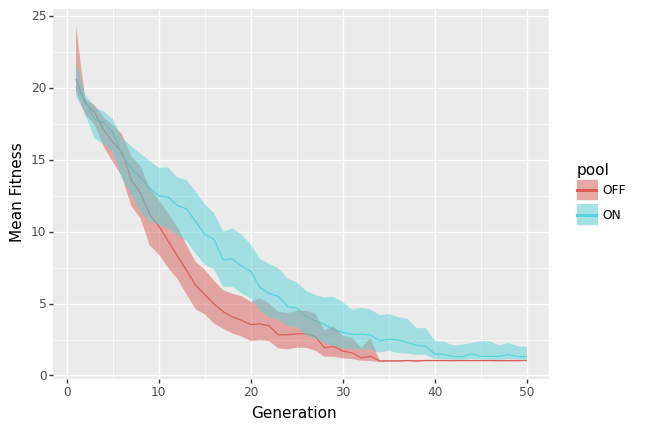

<ggplot: (8741072614989)>

In [110]:
from plotnine import *
fig = (
  ggplot(df, aes(x='generation', y='meanfitness', color='pool'))
  + geom_line() # line plot
  + geom_ribbon(aes(ymax='highfitness',ymin='lowfitness',fill='pool'),color='none',alpha=0.5)
  + labs(x='Generation', y='Mean Fitness')
)
fig.save("poolvsnopool.png",dpi=300)
fig


/mnt/ufs18/home-107/jory/micromamba/envs/supexp/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/mnt/ufs18/home-107/jory/micromamba/envs/supexp/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: asp_size.png


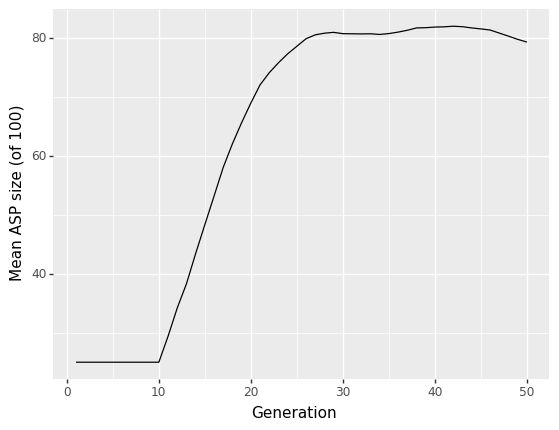

<ggplot: (8741072438477)>

In [114]:
from plotnine import *
fig = (ggplot(df.query('pool == "ON"'),aes(x='generation',y='meanaspsize'))
  + geom_line()
  + labs(x='Generation', y='Mean ASP size (of 100)')
)
fig.save("asp_size.png", dpi=300)
fig